# Federations analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_federation_standards():
    # Load and merge data
    meets_df = pd.read_csv('meets.csv')
    lifters_df = pd.read_csv('openpowerlifting.csv')
    combined_df = pd.merge(lifters_df, meets_df, on='MeetID')
    
    # Get top 15 federations by number of participants
    top_feds = combined_df['Federation'].value_counts().head(15).index
    df_filtered = combined_df[combined_df['Federation'].isin(top_feds)]
    
    # Create federation comparison plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Plot 1: Average Total Weight by Federation
    sns.barplot(data=df_filtered, x='Federation', y='TotalKg', ax=ax1)
    ax1.set_title('Average Total Weight by Federation')
    ax1.set_xlabel('Federation')
    ax1.set_ylabel('Total Weight (Kg)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Average Wilks Score by Federation
    sns.barplot(data=df_filtered, x='Federation', y='Wilks', ax=ax2)
    ax2.set_title('Average Wilks Score by Federation')
    ax2.set_xlabel('Federation')
    ax2.set_ylabel('Wilks Score')
    ax2.tick_params(axis='x', rotation=45)
    
    # Plot 3: Number of Competitors by Federation
    fed_counts = df_filtered['Federation'].value_counts()
    sns.barplot(x=fed_counts.index, y=fed_counts.values, ax=ax3)
    ax3.set_title('Number of Competitors by Federation')
    ax3.set_xlabel('Federation')
    ax3.set_ylabel('Number of Competitors')
    ax3.tick_params(axis='x', rotation=45)
    
    # Plot 4: Performance Distribution by Federation
    sns.boxplot(data=df_filtered, x='Federation', y='TotalKg', ax=ax4)
    ax4.set_title('Performance Distribution by Federation')
    ax4.set_xlabel('Federation')
    ax4.set_ylabel('Total Weight (Kg)')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Return statistical summary
    return df_filtered.groupby('Federation').agg({
        'TotalKg': ['mean', 'std', 'count'],
        'Wilks': ['mean', 'std']
    }).round(2)

Analyzing federation performance standards...


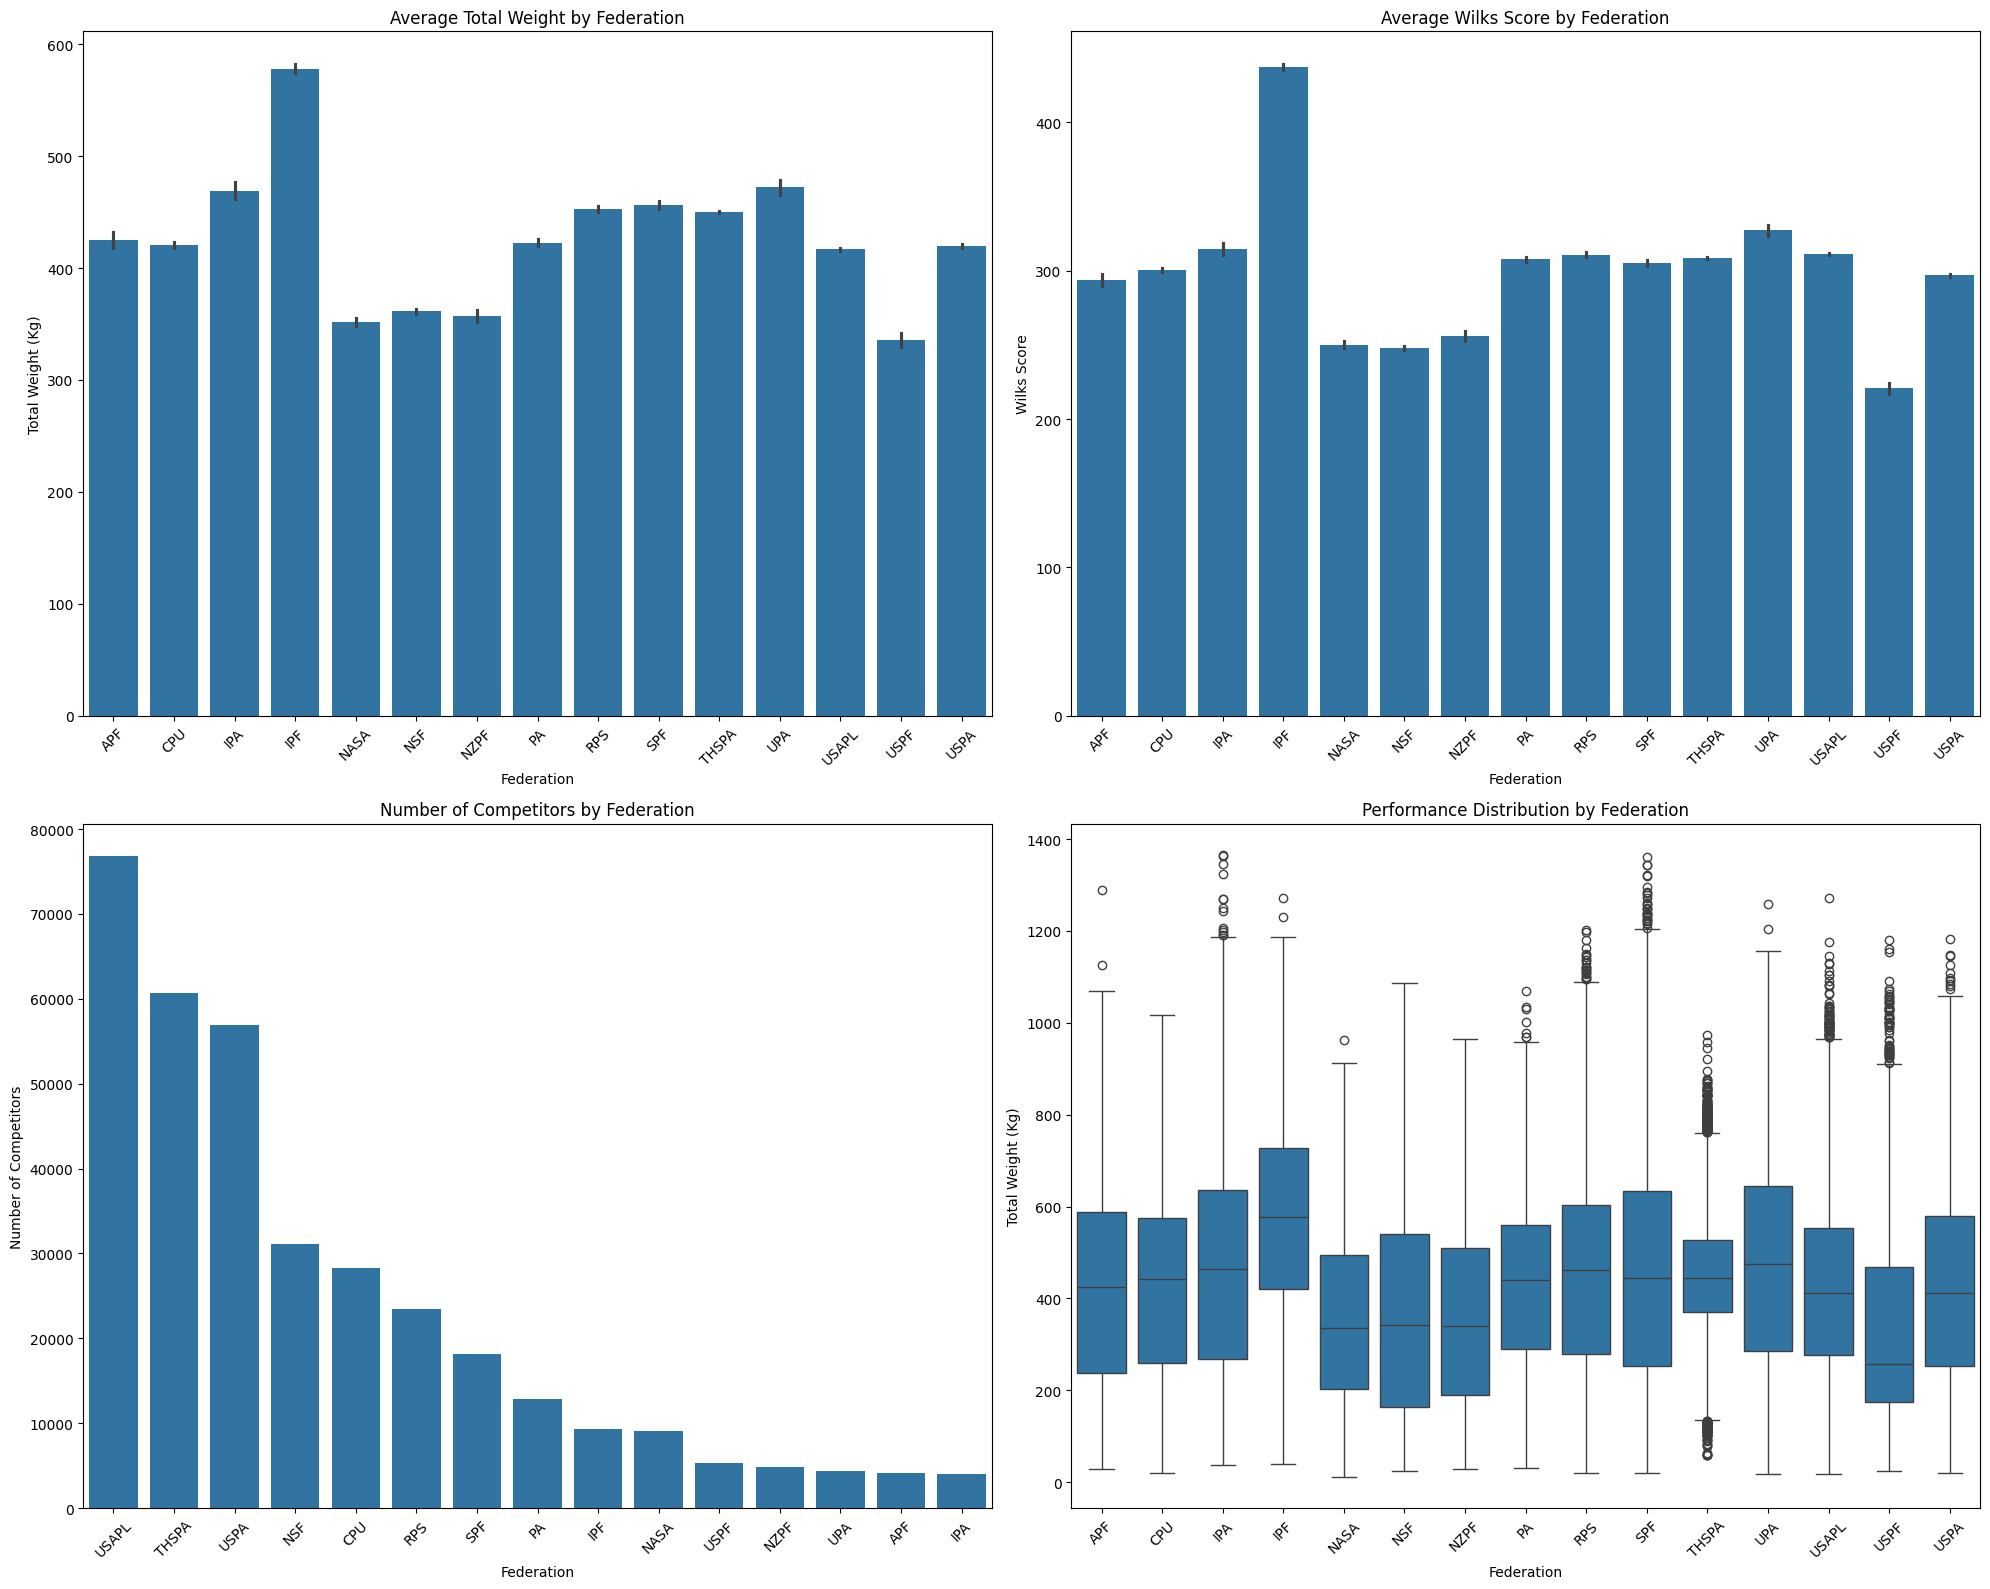


Detailed Federation Statistics:

Total Weight Statistics by Federation:
              mean     std  count
Federation                       
APF         425.07  215.05   3877
CPU         420.51  197.74  28304
IPA         468.95  238.72   3982
IPF         578.24  208.82   8682
NASA        352.08  183.22   8814
NSF         361.32  212.30  28965
NZPF        356.90  192.71   4677
PA          422.64  180.95  12101
RPS         452.42  205.98  22663
SPF         456.37  238.45  17653
THSPA       449.62  113.34  52666
UPA         472.72  229.37   4128
USAPL       416.69  178.63  73317
USPA        419.29  201.94  53741
USPF        335.58  217.24   4906

Wilks Score Statistics by Federation:
              mean     std
Federation                
APF         293.89  125.48
CPU         300.77  117.48
IPA         314.90  136.97
IPF         437.32  105.40
NASA        250.14  110.95
NSF         247.89  133.78
NZPF        255.72  118.47
PA          307.67  106.09
RPS         310.94  113.92
SPF         3

C:\Users\glamb\AppData\Local\Temp\ipykernel_14184\1202805322.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

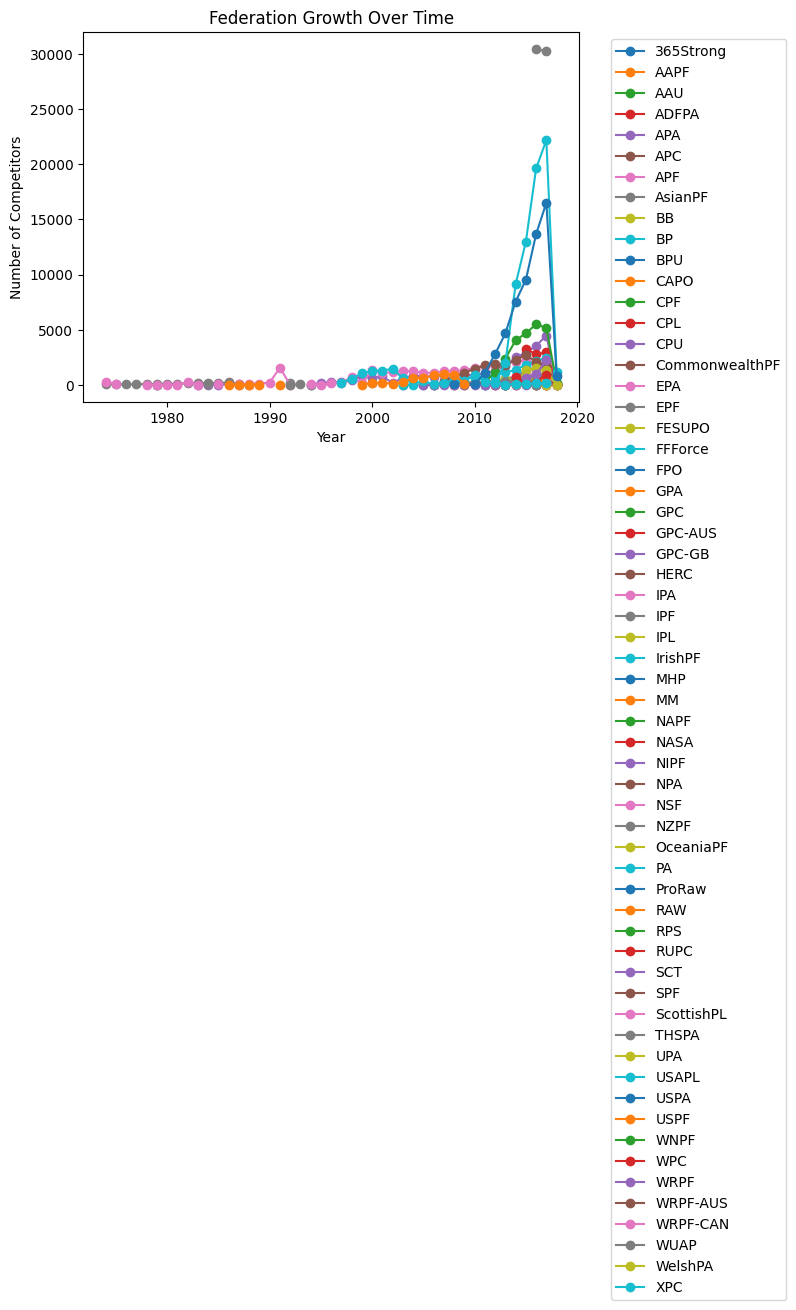

In [7]:
# Example usage
print("Analyzing federation performance standards...")

# Call the analysis function
federation_stats = analyze_federation_standards()

# Display detailed statistics
print("\nDetailed Federation Statistics:")
print("\nTotal Weight Statistics by Federation:")
print(federation_stats['TotalKg'])

print("\nWilks Score Statistics by Federation:")
print(federation_stats['Wilks'])

# Additional analysis example
lifters_df = pd.read_csv('openpowerlifting.csv')
meets_df = pd.read_csv('meets.csv')
combined_df = pd.merge(lifters_df, meets_df, on='MeetID')

# Time-based analysis
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df['Year'] = combined_df['Date'].dt.year

# Plot federation growth over time
plt.figure(figsize=(15, 8))
federation_growth = combined_df.groupby(['Year', 'Federation']).size().unstack()
federation_growth.plot(kind='line', marker='o')
plt.title('Federation Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Competitors')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()